In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterSciNotation, StrMethodFormatter

import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr as scipy_pearsonr

import os

C:\Program Files\Anaconda3\envs\carmi_thesis_3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import importlib
import plot, loaders
plot = importlib.reload(plot)
loaders = importlib.reload(loaders)

In [3]:
PGS_DIR = os.path.join("data", "pgs")
SAVE_FIG_DIR = "figureS4"

# PGS-Phenotype Scatter

In [4]:
longevity_height_data = loaders.load_longevity_data(pgs_col=os.path.join(PGS_DIR, "longevity_height"), convert_to_cm=True)
height_model_covar = sm.OLS(endog=longevity_height_data["Height"], exog=longevity_height_data[["const", "Gender", "Age"]]).fit()
longevity_height_data = longevity_height_data.join(height_model_covar.resid.rename("Height_resid"))
height_model_pgs = sm.OLS(endog=longevity_height_data["Height_resid"], exog=longevity_height_data[["const", "PGS"]]).fit()
longevity_height_data["predicted"] = height_model_pgs.fittedvalues
longevity_height_data.head()

const  Gender  Age       PGS  Height  Height_resid  predicted
FID IID                                                               
2   427    1.0       0   61  0.000028  157.48     -5.170359  -3.367195
    448    1.0       1   62  0.000028  177.80     -0.060077  -3.320199
11  615    1.0       0   64  0.000042  157.48     -5.118246  -2.220457
    616    1.0       1   65  0.000086  172.72     -5.087965   1.386658
24  887    1.0       1   65  0.000106  187.96     10.152035   3.036329

In [5]:
aspis_data = loaders.load_aspis_data(pgs_col=os.path.join(PGS_DIR, "aspis_gcf"))
iq_model_pgs = sm.OLS(endog=aspis_data["IQ"], exog=aspis_data[["const", "PGS"]]).fit()
aspis_data["predicted"] = iq_model_pgs.fittedvalues
aspis_data.head()

const       PGS         IQ   predicted
FID IID                                        
5   5      1.0  0.000005  95.673167  106.461505
10  10     1.0 -0.000014  98.480256   97.993960
11  11     1.0 -0.000012  91.335666   98.792684
22  22     1.0 -0.000005  87.262629  102.010533
41  41     1.0 -0.000008  97.917961  100.485677

In [6]:
large_fam_data = pd.read_csv(os.path.join("data", "large-fam_height_lim.csv"))
large_fam_data.head()

FID  IID  age  sex   predicted    measured
0  274    1   45    1  171.985080  172.392999
1  274    2   43    2  167.724043  162.669588
2  274    3   42    2  174.885904  174.006001
3  274    4   41    2  176.036211  166.437195
4  274    5   38    2  176.432082  169.612194

In [7]:
longevity_bmi_data = loaders.load_longevity_bmi_data(pgs_col=os.path.join(PGS_DIR, "longevity_bmi"))
bmi_model_covar = sm.OLS.from_formula("BMI ~ 1 + Gender + Age", longevity_bmi_data).fit()
longevity_bmi_data["BMI_resid"] = bmi_model_covar.resid
bmi_model_pgs_res = sm.OLS.from_formula("BMI_resid ~ 1 + PGS", longevity_bmi_data).fit()
longevity_bmi_data["predicted"] = bmi_model_pgs_res.fittedvalues
longevity_bmi_data.head(3)

const  Gender  Age       PGS        BMI  BMI_resid  predicted
FID IID                                                               
2   427    1.0       0   61 -0.000056  27.454936   1.657928  -0.342669
    448    1.0       1   62 -0.000050  30.272873   3.303162   0.021580
11  615    1.0       0   64 -0.000053  24.563013  -1.062952  -0.129088

### Basic Stats

In [14]:
pd.concat([longevity_height_data["Height_resid"].describe().rename("Height_resid_all"), 
           longevity_height_data.query("Gender==1")["Height_resid"].describe().rename("Height_resid_male"),
           longevity_height_data.query("Gender==0")["Height_resid"].describe().rename("Height_resid_female"),
           longevity_height_data["Height"].describe().rename("Height_all"), 
           longevity_height_data.query("Gender==1")["Height"].describe().rename("Height_male"), 
           longevity_height_data.query("Gender==0")["Height"].describe().rename("Height_female"),
           longevity_bmi_data["BMI_resid"].describe().rename("BMI_resid_all"), 
           longevity_bmi_data.query("Gender==1")["BMI_resid"].describe().rename("BMI_resid_male"),
           longevity_bmi_data.query("Gender==0")["BMI_resid"].describe().rename("BMI_resid_female"),
           longevity_bmi_data["BMI"].describe().rename("BMI_all"), 
           longevity_bmi_data.query("Gender==1")["BMI"].describe().rename("BMI_male"), 
           longevity_bmi_data.query("Gender==0")["BMI"].describe().rename("BMI_female"),
           aspis_data["IQ"].describe(),
           large_fam_data["measured"].describe().rename("pedigree_Height_all"), 
           large_fam_data.query("sex==1")["measured"].describe().rename("pedigree_Height_male"), 
           large_fam_data.query("sex==2")["measured"].describe().rename("pedigree_Height_female"),
          ],
          axis="columns").applymap("{:.4f}".format).T

count      mean      std       min       25%  \
Height_resid_all        206.0000   -0.0000   6.1047  -15.3869   -4.8892   
Height_resid_male       103.0000   -0.0000   6.1507  -15.3869   -4.4182   
Height_resid_female     103.0000   -0.0000   6.0883  -14.9829   -5.0835   
Height_all              206.0000  170.1245   9.7551  147.3200  162.5600   
Height_male             103.0000  177.7137   6.1373  162.5600  173.3550   
Height_female           103.0000  162.5353   6.1049  147.3200  157.4800   
BMI_resid_all           203.0000    0.0000   4.4154  -10.2097   -2.6587   
BMI_resid_male          102.0000    0.0000   3.7944  -10.2097   -2.4150   
BMI_resid_female        101.0000    0.0000   4.9839   -7.9812   -3.0196   
BMI_all                 203.0000   25.9506   4.4703   15.8478   22.8687   
BMI_male                102.0000   26.4851   3.8848   15.8478   23.9131   
BMI_female              101.0000   25.4109   4.9537   18.0130   22.1279   
IQ                      919.0000  100.0000  14.9837   47.3285   90.6601   
pedigree_Height_all     308.0000  172.7738   5.6427  155.3758  169.2330   
pedigree_Height_male    158.0000  172.9167   5.7021  158.1500  168.9145   
pedigree_Height_female  150.0000  172.6233   5.5946  155.3758  169.3473   

                             50%       75%       max  
Height_resid_all          0.0898    5.0070   12.7789  
Height_resid_male         0.1831    5.0026   12.7789  
Height_resid_female      -0.0556    4.9896   12.5228  
Height_all              170.1800  177.8000  190.5000  
Height_male             177.8000  182.8800  190.5000  
Height_female           162.5600  167.6400  175.2600  
BMI_resid_all            -0.5610    2.3029   25.6203  
BMI_resid_male           -0.1138    2.1410   15.9604  
BMI_resid_female         -1.0415    2.8277   25.6203  
BMI_all                  25.2000   28.3663   51.2463  
BMI_male                 26.3532   28.7034   42.8731  
BMI_female               24.3396   27.9442   51.2463  
IQ                      100.6221  110.1896  140.2093  
pedigree_Height_all     172.7775  176.4861  189.0840  
pedigree_Height_male    172.6816  176.3265  189.0250  
pedigree_Height_female  173.0797  176.5015  189.0840

### Regression Plot

In [10]:
PLOT_THICKENS = True
if PLOT_THICKENS:
    # sns.plotting_context("talk")
    CUSTOM_SNS_RC = {'xtick.labelsize': 13.5, 'ytick.labelsize': 13.5, 'legend.fontsize': 13.0, 
                                                 'axes.labelsize': 14, 'axes.titlesize': 15}
    # sns.set_context("paper", font_scale=1.4, rc=CUSTOM_SNS_RC)
    sns.set_context("talk", font_scale=1, rc=CUSTOM_SNS_RC)

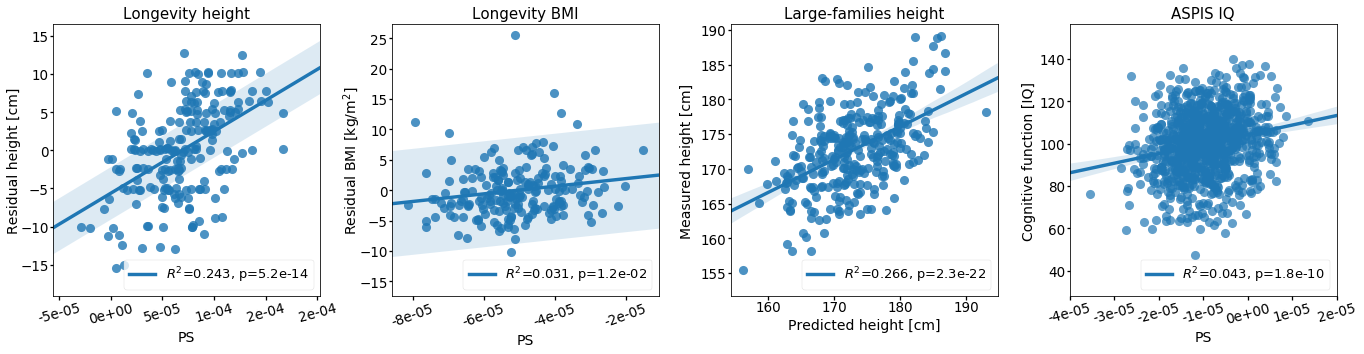

In [58]:
fig, ax = plt.subplots(1, 4, figsize=(23, 5))

r, p = scipy_pearsonr(longevity_height_data["PGS"], longevity_height_data["Height_resid"])
label = "$R^2$={r:.3f}, p={p:.1e}".format(r=r**2, p=p)
sns.regplot(x=longevity_height_data["PGS"], y=longevity_height_data["Height_resid"], ax=ax[0],
            line_kws=dict(label=label))
ax[0].set_xlim(longevity_height_data["PGS"].min() - abs(longevity_height_data["PGS"].quantile(0.15)), 
               longevity_height_data["PGS"].max() + abs(longevity_height_data["PGS"].quantile(0.20)))
ax[0].set_ylim(longevity_height_data["Height_resid"].min() - longevity_height_data["Height_resid"].quantile(0.7), 
               longevity_height_data["Height_resid"].max() + longevity_height_data["Height_resid"].quantile(0.7))
ax[0].set_title("Longevity height")
ax[0].set_ylabel("Residual height [cm]")
ax[0].set_xlabel("PS")
ax[0].xaxis.set_major_formatter(StrMethodFormatter("{x:.0e}"))
ax[0].xaxis.set_tick_params(rotation=15)
ax[0].tick_params(pad=1)
ax[0].yaxis.set_label_coords(-0.12, 0.5)
ax[0].legend(loc="lower right")


r, p = scipy_pearsonr(longevity_bmi_data["PGS"], longevity_bmi_data["BMI_resid"])
label = "$R^2$={r:.3f}, p={p:.1e}".format(r=r**2, p=p)
sns.regplot(x=longevity_bmi_data["PGS"], y=longevity_bmi_data["BMI_resid"], ax=ax[1], color="C0",
            line_kws=dict(label=label))
ax[1].set_xlim(longevity_bmi_data["PGS"].min() - abs(longevity_bmi_data["PGS"].quantile(1))*0.3, 
               longevity_bmi_data["PGS"].max() + abs(longevity_bmi_data["PGS"].quantile(1))*0.3)
ax[1].set_ylim(longevity_bmi_data["BMI_resid"].min() - longevity_bmi_data["BMI_resid"].quantile(0.96), 
               longevity_bmi_data["BMI_resid"].max() + longevity_bmi_data["BMI_resid"].quantile(0.7))
ax[1].set_title("Longevity BMI")
ax[1].set_ylabel("Residual BMI [kg/m$^2$]")
ax[1].set_xlabel("PS")
ax[1].xaxis.set_major_formatter(StrMethodFormatter("{x:.0e}"))
ax[1].xaxis.set_tick_params(rotation=20)
ax[1].tick_params(pad=1)
ax[1].yaxis.set_label_coords(-0.11, 0.5)
ax[1].legend(loc="lower right")


r, p = scipy_pearsonr(large_fam_data["predicted"], large_fam_data["measured"])
label = "$R^2$={r:.3f}, p={p:.1e}".format(r=r**2, p=p)
sns.regplot(x=large_fam_data["predicted"], y=large_fam_data["measured"], ax=ax[2], color="C0",
            line_kws=dict(label=label))
ax[2].set_ylim(ax[2].get_ylim()[0]-2, ax[2].get_ylim()[1])
ax[2].set_title("Large-families height")
ax[2].set_ylabel("Measured height [cm]")
ax[2].set_xlabel("Predicted height [cm]")
ax[2].tick_params(pad=1)
ax[2].yaxis.set_label_coords(-0.14, 0.5)
ax[2].legend(loc="lower right")


r, p = scipy_pearsonr(aspis_data["PGS"], aspis_data["IQ"])
label = "$R^2$={r:.3f}, p={p:.1e}".format(r=r**2, p=p)
sns.regplot(x=aspis_data["PGS"], y=aspis_data["IQ"], ax=ax[3], color="C0",
            scatter_kws={"alpha": 0.7}, line_kws=dict(label=label))
ax[3].set_xlim(-0.00004, 0.00002)
ax[3].set_ylim(40 - 12, ax[3].get_ylim()[1])
ax[3].set_title("ASPIS IQ")
ax[3].set_ylabel("Cognitive function [IQ]")
ax[3].set_xlabel("PS")
ax[3].xaxis.set_major_formatter(StrMethodFormatter("{x:.0e}"))
ax[3].tick_params(pad=1)
ax[3].xaxis.set_tick_params(rotation=15)
ax[3].legend(loc="lower right")

fig.subplots_adjust(wspace=0.27);

In [59]:
plot.save_fig(fig, "reg_plot" + ("_thick" if PLOT_THICKENS else ""), SAVE_FIG_DIR)